In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Read the csv file into a pandas DataFrame
songs_csv = "../../Resources/merged_songs_data.csv"
songs_df = pd.read_csv(songs_csv, index_col=0)
# songs_df.columns
songs_df = songs_df.dropna()
songs_df = songs_df.sort_values(by=['popularity'])
songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','popularity']].describe()

G:\Programs\Anaconda\envs\PythonAdv\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000
mean,0.501157,0.577846,5.308393,-10.474196,0.729206,0.068865,0.333271,0.194327,0.209889,0.479666,121.857204,3.876187,13.407900
std,0.174248,0.276373,3.569734,5.743470,0.444454,0.085543,0.349800,0.331703,0.198168,0.258016,30.974053,0.454477,16.097914
min,0.000000,0.001970,0.000000,-41.010000,0.000000,0.000000,0.000002,0.000000,0.020400,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.359000,2.000000,-13.315000,0.000000,0.033500,0.013500,0.000004,0.097500,0.269000,97.563000,4.000000,0.000000
50%,0.501000,0.608000,5.000000,-9.213000,1.000000,0.042000,0.174000,0.000771,0.126000,0.479000,120.111000,4.000000,6.000000
75%,0.621000,0.821000,9.000000,-6.334000,1.000000,0.063600,0.671000,0.226000,0.258000,0.683000,141.296000,4.000000,23.000000
max,0.957000,0.998000,11.000000,3.802000,1.000000,0.933000,0.995000,0.988000,1.000000,0.984000,212.155000,5.000000,77.000000


In [9]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
# X = songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']]
# X = songs_df[['danceability', 'energy', 'key', 'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]
X = songs_df[['danceability', 'energy', 'loudness','valence','tempo']]
y = songs_df["popularity"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2633, 5) (2633, 1)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.09611953278215302


## Residuals ##

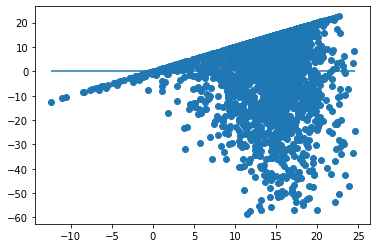

In [11]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()